# Linear Regression
다음의 항목들에 대해서 학습합니다.

* 선형회귀(Linear Regression)
* 회귀모델 평가


## 1.환경준비

### (1) Import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### (2) data loading

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)

|	변수	|	설명	|
|	----	|	----	|
|	**medv**	|	**타운별 집값(중위수), target**	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율, 편의시설(관공서, 주요 시설)	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 이해

### (1) 둘러보기

In [3]:
# 상/하위 몇개 행을 살펴 봅시다.
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# 각 칼럼의 타입을 살펴 봅시다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## 3.데이터 준비

### (1) 데이터 정리

In [5]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.drop(['black'], axis = 1, inplace = True)

### (2) 데이터분할1 : x, y 나누기

In [7]:
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

### (5) 데이터분할2 : train : validation 나누기

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

### (6) Scaling

## 4.모델링 : 단순회귀

### (1)학습할 데이터 준비

* 모델링을 시작하기 전에...
    * 데이터를 살펴보면서, 어떤 변수가 집값을 예측하는데 가장 중요할까요?

In [ ]:
# tax

* lstat(하위계층 비율)로만 집값(medv)을 예측하는 모델을 만들어 봅시다.

In [11]:
# 학습에 사용할 변수를 지정합니다.
features = ['lstat']

# 지정된 변수로 데이터셋을 만듭니다. 
# 학습과 검증시 아래 데이터셋 이름을 사용합니다.
x_train1 = x_train[features] # x의 열이 하나여도 2차원 형태로 저장
x_val1 = x_val[features]

In [12]:
x_train1.head()

,lstat
257,5.12
371,9.53
253,3.54
332,7.83
454,18.71


### (2) 필요한 함수 불러오기
이 부분은 파일의 제일 첫 부분에서 한꺼번에 수행해도 좋습니다.

In [14]:
# 모델링용
from sklearn.linear_model import LinearRegression

# 회귀모델 평가용
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### (3) 모델선언

In [15]:
model1 = LinearRegression()

### (4) 모델링(학습)

In [16]:
model1.fit(x_train1, y_train)

LinearRegression()

* 회귀계수 확인하기

In [17]:
print('회귀계수 : ', model1.coef_)
print('절편 : ', model1.intercept_)

회귀계수 :  [-0.9568563]
절편 :  34.676249051494665


### (5) 검증 : 예측

In [18]:
pred1 = model1.predict(x_val1) # 학습할 때 x의 데이터 구조와 예측 시 x의 데이터 구조는 똑같아야 함

### (6) 검증 : 평가

* 평가용 함수들은 대부분 (실제값, 예측값)

In [19]:
# 평균오차
mean_absolute_error(y_val, pred1)

4.138380487348265

## 5.평가

### (1) 오차의 비로 평가하기 : R2 Score

* 평균 모델의 오차와 회귀모델 오차
    * 평균 모델과 실제 값 과의 차이(SST)
    * 평균 모델과 회귀모델 과의 차이(SSR)
    * 실제 값과 회귀모델 과의 차이(SSE)


In [ ]:
# 실제와 예측 데이터 5건씩 저장
tmp_y = y_val[:5]
tmp_p = pred1[:5]

# 실제값의 평균오차 저장
tmp_y_mean = tmp_y.mean()

In [ ]:
# SST
sst = np.sum(np.power(tmp_y - tmp_y_mean, 2))

In [ ]:
# SSE
sse = np.sum(np.power(tmp_y - tmp_p, 2))

In [ ]:
# R2 Score = 1- SSE/SST
1 - (sse/sst)

In [ ]:
# 제공된 함수와 비교해 봅시다.
r2_score(tmp_y, tmp_p)

### (2)오차의 양과 율로 평가하기

In [ ]:
# MSE
mean_squared_error( y_val   , pred1   ) 

In [ ]:
# RMSE
mean_squared_error( y_val   , pred1  , squared = False)

In [ ]:
# MAE
mean_absolute_error(y_val   , pred1   )

In [ ]:
# MAPE
mean_absolute_percentage_error(y_val   , pred1  )

In [ ]:
# 1 - MAPE : 회귀모델의 정확도
1 -  mean_absolute_percentage_error(y_val   , pred1   )

## 6.연습문제
* 모델을 2개 더 만들어 봅시다. 여러분이 중요하다고 생각한 변수로 모델2, 모델3을 만들어 봅시다.
    * model2 : 중요하다고 생각한 변수1  --> medv
    * model3 : 중요하다고 생각한 변수2  --> medv
* 모델1,2,3의 성능을 비교해 봅시다.
* 평가는 RMSE, MAE, MAPE로 사용

### (1) 모델2

In [51]:
# 학습에 사용할 변수를 지정합니다.
features = ['tax']
x_train2 = x_train[features]
x_val2 = x_val[features]

In [52]:
model2 = LinearRegression()
model2.fit(x_train2, y_train)
pred2 = model2.predict(x_val2)

In [53]:
mean_squared_error(y_val, pred2, squared=False)

7.635881461292628

In [24]:
1 - mean_absolute_percentage_error(y_val, pred2)

0.6387986458008444

### (2) 모델3

In [49]:
# 학습에 사용할 변수를 지정합니다.
features = ['indus']
x_train3 = x_train[features]
x_val3 = x_val[features]

In [50]:
model3 = LinearRegression()
model3.fit(x_train3, y_train)
pred3 = model3.predict(x_val3)

In [27]:
mean_squared_error(y_val, pred3, squared=False)

7.641651069897593

In [28]:
mean_absolute_error(y_val, pred3)

5.963610772485113

## 7.모델링2 : 다중회귀

* 이번에는 다음의 변수로 예측하는 모델을 각각 만들어 봅시다.
    * model4 : lstat + ptratio 
    * model5 : lstat + ptratio + crim
    * model6 : 전체 변수

### (1) 모델4 

In [33]:
features = ['lstat', 'ptratio']
x_train4 = x_train[features]
x_val4 = x_val[features]

In [34]:
model4 = LinearRegression()

In [35]:
model4.fit(x_train4, y_train)

LinearRegression()

In [36]:
pred4 = model4.predict(x_val4)

### (2) 모델5 

In [37]:
features = ['lstat', 'ptratio', 'crim']
x_train5 = x_train[features]
x_val5 = x_val[features]

In [38]:
model5 = LinearRegression()

In [39]:
model5.fit(x_train5, y_train)

LinearRegression()

In [40]:
pred5 = model5.predict(x_val5)

### (3) 모델6

In [41]:
model6 = LinearRegression()

In [42]:
model6.fit(x_train, y_train)

LinearRegression()

In [43]:
pred6 = model6.predict(x_val)

### (4) 성능 비교 평가
지금까지 모델들에 대해서 성능 비교를 해 봅시다.

* 결과를 하나의 데이터프레임으로 저장해서 비교해 봅시다.

In [44]:
# 방법 1
a1 = mean_squared_error(y_val, pred4, squared=False)
a2 = mean_squared_error(y_val, pred5, squared=False)
a3 = mean_squared_error(y_val, pred6, squared=False)

In [45]:
b1 = mean_absolute_error(y_val, pred4)
b2 = mean_absolute_error(y_val, pred5)
b3 = mean_absolute_error(y_val, pred6)

In [46]:
c1 = mean_absolute_percentage_error(y_val, pred4)
c2 = mean_absolute_percentage_error(y_val, pred5)
c3 = mean_absolute_percentage_error(y_val, pred6)

In [47]:
df = pd.DataFrame({'model': ['model 4', 'model 5', 'model 6'],
                   'RMSE': [a1, a2, a3],
                   'MAE': [b1, b2, b3],
                   'MAPE': [c1, c2, c3]})


In [48]:
df

,model,RMSE,MAE,MAPE
0,model 4,5.490557,4.039846,0.211744
1,model 5,5.484704,4.037551,0.211122
2,model 6,4.798828,3.566514,0.211383


In [56]:
# 방법 2
x = [list(x_train1), list(x_train2), list(x_train3), list(x_train4), list(x_train5), list(x_train)]
model_no, rmse, mae, mape = [], [], [], []
pred = [pred1, pred2, pred3, pred4, pred5, pred6]

for i, p in enumerate(pred): # i: idx no.
    model_no.append(i+1)
    rmse.append(mean_squared_error(y_val, p, squared=False))
    mae.append(mean_absolute_error(y_val, p))
    mape.append(mean_absolute_percentage_error(y_val, p))

result = pd.DataFrame({'model_no': model_no, 'rmse': rmse, 'mae': mae, 'mape': mape, 'variable': x})

In [57]:
result

,model_no,rmse,mae,mape,variable
0,1,5.618125,4.138380,0.223987,[lstat]
1,2,7.635881,5.933090,0.361201,[tax]
2,3,7.641651,5.963611,0.381457,[indus]
3,4,5.490557,4.039846,0.211744,"[lstat, ptratio]"
4,5,5.484704,4.037551,0.211122,"[lstat, ptratio, crim]"
5,6,4.798828,3.566514,0.211383,"[crim, zn, indus, chas, nox, rm, age, dis, rad..."


- rmse, mae는 model 6이 가장 작으나, mape는 model 5이 가장 작음

In [58]:
import seaborn as sns

* 변수중요도 그래프 그리기 함수 만들기

In [59]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

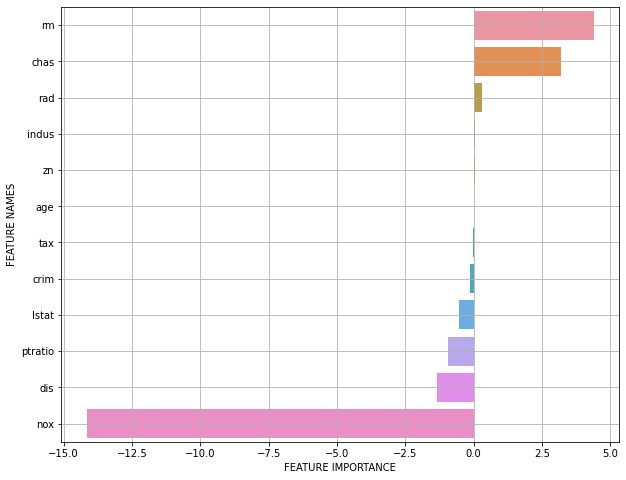

In [60]:
# 회귀계수의 크기가 변수의 중요도라고 가정(but 실제로는 값의 범위에 따라 다름!)
r = plot_feature_importance(model6.coef_, list(x_train))

In [61]:
r

,feature_names,feature_importance
0,rm,4.399446
1,chas,3.201337
2,rad,0.289257
3,indus,0.042286
4,zn,0.038235
5,age,-0.005774
6,tax,-0.012243
7,crim,-0.122426
8,lstat,-0.553256
9,ptratio,-0.932466


In [62]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)

model7 = LinearRegression()
model7.fit(x_train_s, y_train)

LinearRegression()

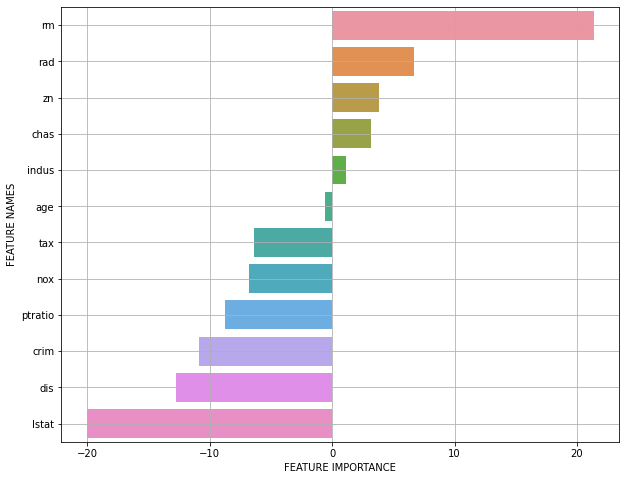

In [63]:
# 스케일링 후 다시 확인
r2 = plot_feature_importance(model7.coef_, list(x_train))

- 선형회귀 모델의 변수 중요도를 회귀계수를 통해 간접적으로 확인할 수 있음
    - but 정확한 방법은 아님 더욱 확실한 방법은 모델링 해석 수업에서!